In [1]:
using Plots
using LinearAlgebra

In [2]:
# data_points =[(3.0, 2.5), (4.5, 1.0), (7.0, 2.5), (9.0, 0.5)]
# data_points = [(0,0),(5,2),(7,-1),(8,-2),(10,20)]
data_points =[(−1.0,0.0385),(−0.5,0.1379),(0.0,1.0),(0.5,0.1379),(1.0,0.0385)]
k = length(data_points)

5

In [3]:
# number of equations 
n = k-1 
# number of unknows variables 
number_of_unknows_variables = 4*n

16

In [4]:
x_points = [x for (x, y) in data_points]
y_points = [y for (x, y) in data_points]

5-element Vector{Float64}:
 0.0385
 0.1379
 1.0
 0.1379
 0.0385

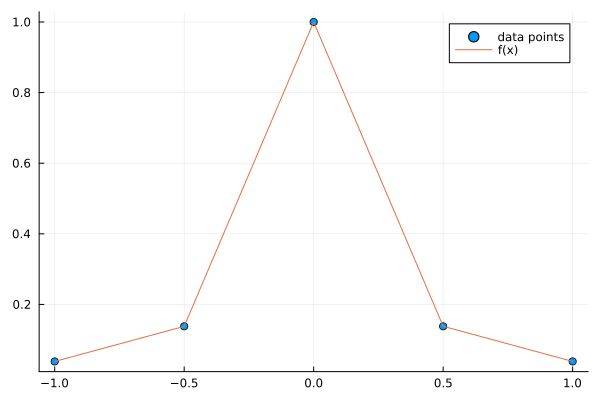

In [5]:
scatter!(x_points, y_points, label="data points")
plot!(x_points,y_points, label="f(x)")

In [6]:
# A matrix
A = zeros(number_of_unknows_variables, number_of_unknows_variables)
# b vector
b = zeros(number_of_unknows_variables)

16-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [7]:
# fill A and b
for i in 1:n
    x_i = x_points[i]
    y_i = y_points[i]
    x_i_plus_1 = x_points[i+1]
    y_i_plus_1 = y_points[i+1]
    
    # fill b
    b[2*i-1] = y_i
    b[2*i] = y_i_plus_1
    # fill A
    A[2*i-1, 4*i-3:4*i] = [x_i^3, x_i^2, x_i, 1]

    A[2*i, 4*i-3:4*i] = [x_i_plus_1^3, x_i_plus_1^2, x_i_plus_1, 1]

end

In [8]:
# fill the first derivative

for i in 1:n-1
    x_i = x_points[i+1]
    x_i_plus_1 = x_points[i+2]
    A[2*n+i, 4*i-3:4*i] = [3*x_i^2, 2*x_i, 1, 0]
    A[2*n+i, 4*i+1:4*i+4] =  [-3*x_i^2, -2*x_i, -1, 0]

end

In [9]:
A

16×16 Matrix{Float64}:
 -1.0     1.0   -1.0  1.0   0.0    …   0.0  0.0   0.0     0.0    0.0  0.0
 -0.125   0.25  -0.5  1.0   0.0        0.0  0.0   0.0     0.0    0.0  0.0
  0.0     0.0    0.0  0.0  -0.125      0.0  0.0   0.0     0.0    0.0  0.0
  0.0     0.0    0.0  0.0   0.0        0.0  0.0   0.0     0.0    0.0  0.0
  0.0     0.0    0.0  0.0   0.0        0.0  1.0   0.0     0.0    0.0  0.0
  0.0     0.0    0.0  0.0   0.0    …   0.5  1.0   0.0     0.0    0.0  0.0
  0.0     0.0    0.0  0.0   0.0        0.0  0.0   0.125   0.25   0.5  1.0
  0.0     0.0    0.0  0.0   0.0        0.0  0.0   1.0     1.0    1.0  1.0
  0.75   -1.0    1.0  0.0  -0.75       0.0  0.0   0.0     0.0    0.0  0.0
  0.0     0.0    0.0  0.0   0.0       -1.0  0.0   0.0     0.0    0.0  0.0
  0.0     0.0    0.0  0.0   0.0    …   1.0  0.0  -0.75   -1.0   -1.0  0.0
  0.0     0.0    0.0  0.0   0.0        0.0  0.0   0.0     0.0    0.0  0.0
  0.0     0.0    0.0  0.0   0.0        0.0  0.0   0.0     0.0    0.0  0.0
  0.0     0.0  

In [10]:
# fill the second derivative
for i in 1:n-1
    x_i = x_points[i+1]
    A[3*n+i-1, 4*i-3:4*i] = [6*x_i, 2, 0, 0]
    A[3*n+i-1, 4*i+1:4*i+4] =  [-6*x_i, -2, 0, 0]
end

In [11]:
# assumption of a natural cubic spline 
A[4*n-1, 1:4] = [6*x_points[1], 2, 0, 0]
A[4*n, 4*n-3:4*n] = [6*x_points[n+1], 2, 0, 0]

4-element Vector{Float64}:
 6.0
 2.0
 0.0
 0.0

In [12]:
A

16×16 Matrix{Float64}:
 -1.0     1.0   -1.0  1.0   0.0    …   0.0  0.0   0.0     0.0    0.0  0.0
 -0.125   0.25  -0.5  1.0   0.0        0.0  0.0   0.0     0.0    0.0  0.0
  0.0     0.0    0.0  0.0  -0.125      0.0  0.0   0.0     0.0    0.0  0.0
  0.0     0.0    0.0  0.0   0.0        0.0  0.0   0.0     0.0    0.0  0.0
  0.0     0.0    0.0  0.0   0.0        0.0  1.0   0.0     0.0    0.0  0.0
  0.0     0.0    0.0  0.0   0.0    …   0.5  1.0   0.0     0.0    0.0  0.0
  0.0     0.0    0.0  0.0   0.0        0.0  0.0   0.125   0.25   0.5  1.0
  0.0     0.0    0.0  0.0   0.0        0.0  0.0   1.0     1.0    1.0  1.0
  0.75   -1.0    1.0  0.0  -0.75       0.0  0.0   0.0     0.0    0.0  0.0
  0.0     0.0    0.0  0.0   0.0       -1.0  0.0   0.0     0.0    0.0  0.0
  0.0     0.0    0.0  0.0   0.0    …   1.0  0.0  -0.75   -1.0   -1.0  0.0
 -3.0     2.0    0.0  0.0   3.0        0.0  0.0   0.0     0.0    0.0  0.0
  0.0     0.0    0.0  0.0   0.0        0.0  0.0   0.0     0.0    0.0  0.0
  0.0     0.0  

In [13]:
x = A\b

16-element Vector{Float64}:
  2.72857142857143
  8.18571428571429
  7.702371428571431
  2.283728571428572
 -7.541257142857144
 -7.21902857142857
  8.764918615461763e-16
  1.0
  7.54125714285714
 -7.21902857142857
  8.764918615461763e-16
  0.9999999999999998
 -2.7285714285714264
  8.18571428571428
 -7.702371428571424
  2.2837285714285707

In [14]:
# get the coefficients of the cubic spline
cublic_spline_coefficients = [(x[4*i-3], x[4*i-2], x[4*i-1], x[4*i]) for i in 1:n]

4-element Vector{NTuple{4, Float64}}:
 (2.72857142857143, 8.18571428571429, 7.702371428571431, 2.283728571428572)
 (-7.541257142857144, -7.21902857142857, 8.764918615461763e-16, 1.0)
 (7.54125714285714, -7.21902857142857, 8.764918615461763e-16, 0.9999999999999998)
 (-2.7285714285714264, 8.18571428571428, -7.702371428571424, 2.2837285714285707)

In [15]:
cublic_polyomial(x)=(a,b,c,d)->a*x^3+b*x^2+c*x+d

cublic_polyomial (generic function with 1 method)

In [16]:
# get the intervals of the cubic spline
intervals = [(x_points[i], x_points[i+1]) for i in 1:n]

4-element Vector{Tuple{Float64, Float64}}:
 (-1.0, -0.5)
 (-0.5, 0.0)
 (0.0, 0.5)
 (0.5, 1.0)

In [17]:
function get_index(x)
    for i in 1:n
        if x >= intervals[i][1] && x <= intervals[i][2]
            return i
        end
    end
end

get_index (generic function with 1 method)

In [18]:
function cubic_spline(x)
    i = get_index(x)
    a, b, c, d = cublic_spline_coefficients[i]
    return cublic_polyomial(x)(a, b, c, d)
end

cubic_spline (generic function with 1 method)

In [20]:
x_first_point = x_points[1]
x_last_point = x_points[end]

x_values = range(x_first_point, x_last_point, length=100)

-1.0:0.020202020202020204:1.0

In [21]:
y_values = [cubic_spline(x) for x in x_values]

100-element Vector{Float64}:
  0.038500000000001755
  0.028757994582820245
  0.019150969649563088
  0.009813905684154633
  0.0008817831705201229
 -0.0075104174074169805
 -0.015227715565731437
 -0.022135130820498894
 -0.02809768268779589
 -0.032980390683695404
  ⋮
 -0.028097682687795444
 -0.022135130820499338
 -0.01522771556573188
 -0.007510417407417425
  0.0008817831705187906
  0.00981390568415419
  0.019150969649561755
  0.028757994582818913
  0.03850000000000042

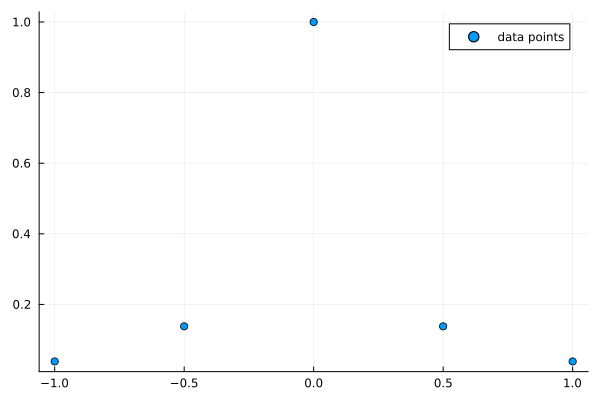

In [22]:
scatter(x_points, y_points, label="data points")

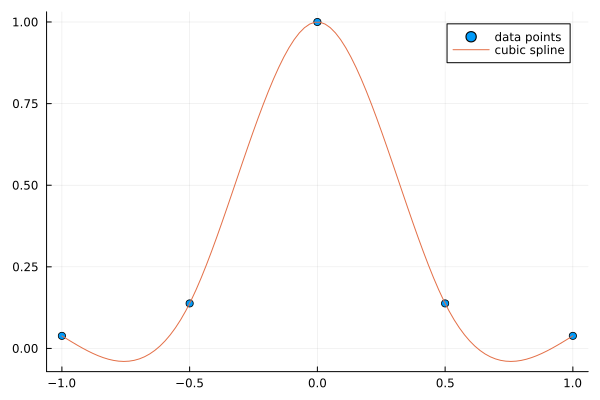

In [23]:
plot!(x_values, y_values, label="cubic spline")